---
#Prediksi Strok Otak menggunakan metode Random Forest dengan  Tuning Parameter 
**Kelompok 2 PPTI 12**

Anggota Kelompok:
1. 	Charlene Jovannie (2502040480)
2. 	Jefferson Johan (2502041224)
3. 	Jevent Natthannael (2502041256)
4. 	Michael Baptista Gozal (2502041262)
5. 	Nicole Felice (2502040562)
---

#Import libraries dan Dataset
Note: Sebelum menjalankan sel di bawah ini, file dataset harus diupload dahulu ke runtime (File yang diupload: full_data.csv)

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import make_classification

In [2]:
#Import dataset
df = pd.read_csv("full_data.csv")

# Informasi Dataset
Kode di bawah ini dimaksudkan untuk mengidentifikasi dataset yang ada, persebaran datanya seperti apa, atributnya ada apa saja, dll.

In [3]:
#Lihat dataset
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
#Cek informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
#Cek data types
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
#Cek data categorical
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


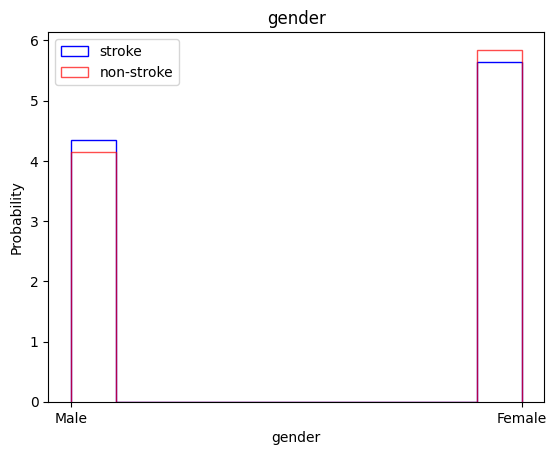

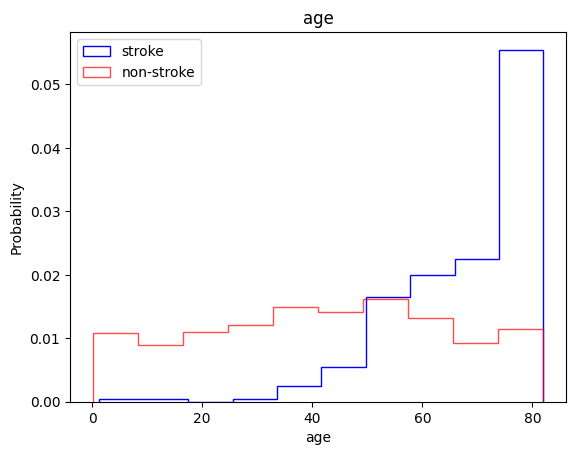

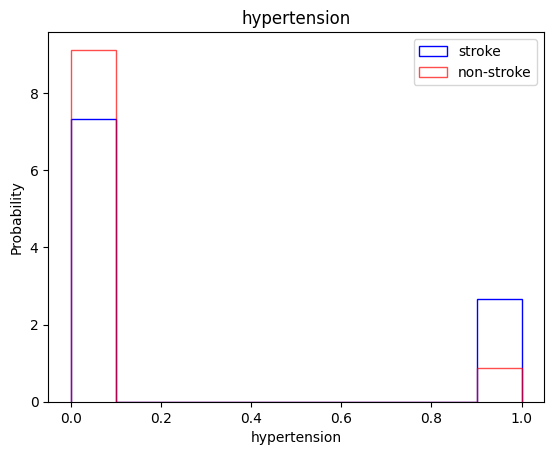

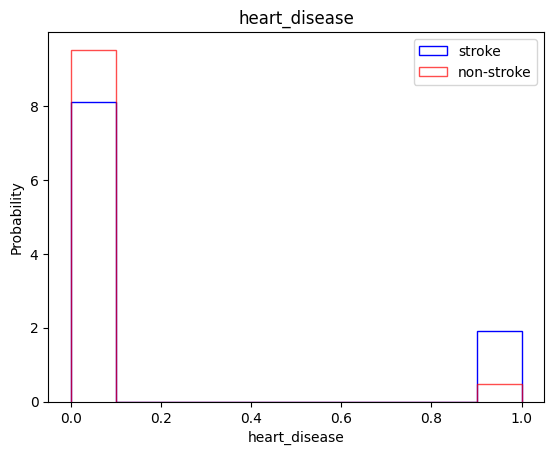

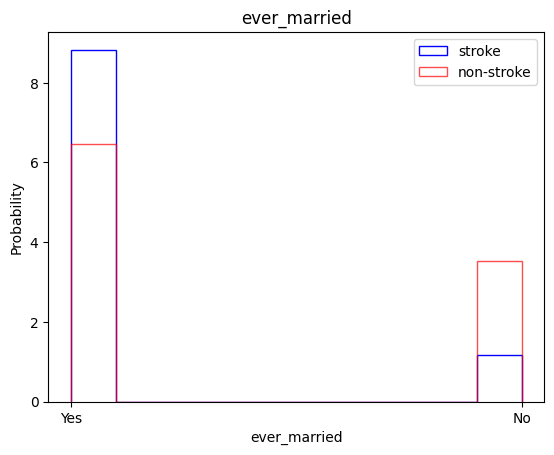

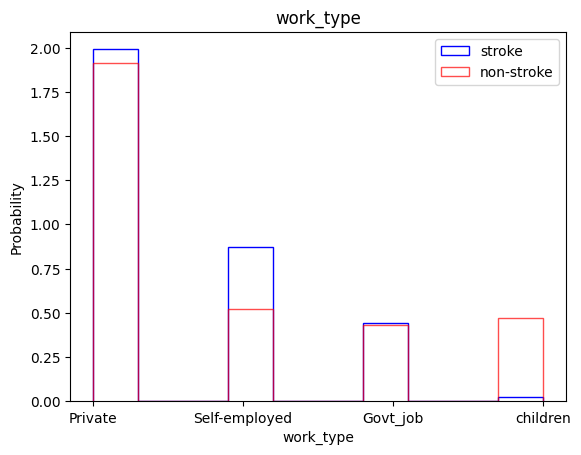

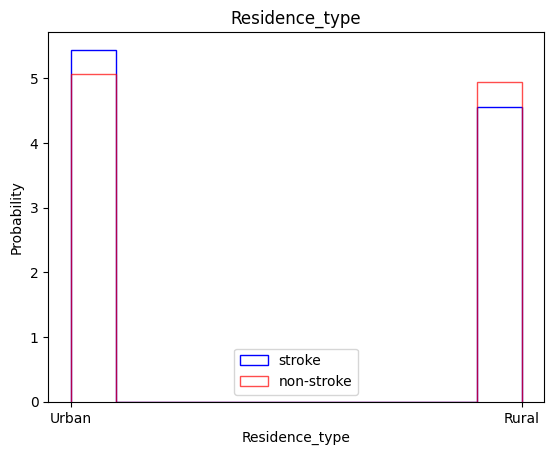

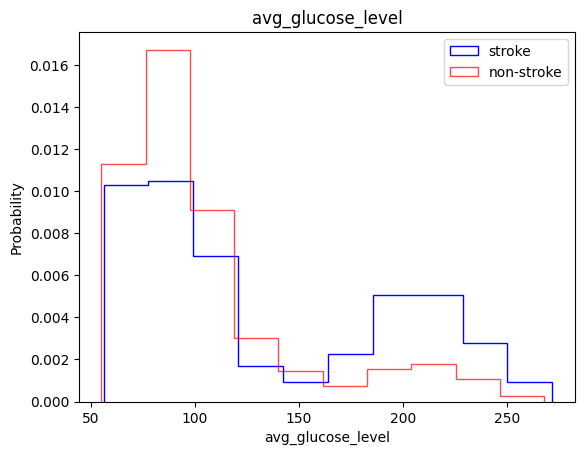

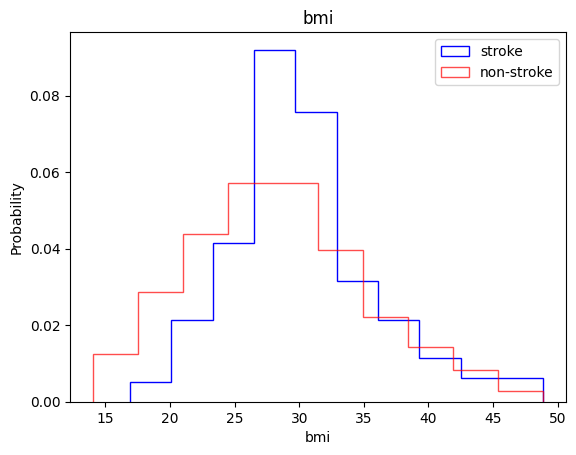

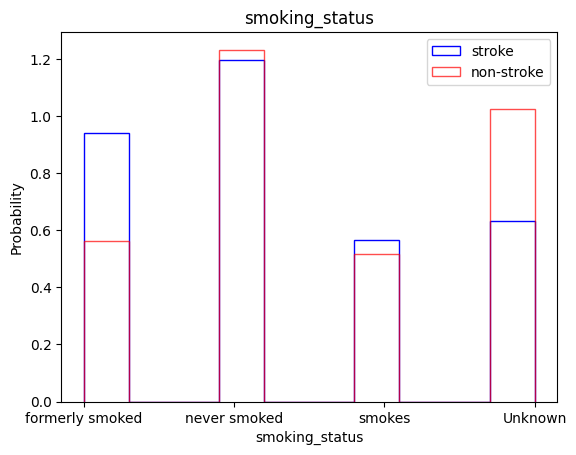

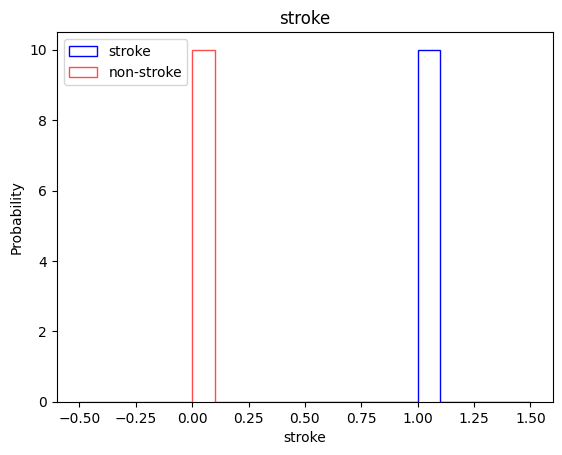

In [7]:
#Untuk melihat plotting persebaran dataset
for label in df[:-1]:
  plt.hist(df[df["stroke"]==1][label], histtype = "step", color="blue", label="stroke", alpha=1, density=True)
  plt.hist(df[df["stroke"]==0][label], histtype = "step", color="red", label="non-stroke", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Pre-processing Dataset
Terdiri dari:
1. Mengubah data categorical menjadi numerical (0 atau 1)
2. Untuk data yang kategorinya hanya binary (2 kategori), data cukup di-replace dengan 0 atau 1
3. Tetapi untuk data kategori yang lebih dari 2, maka harus dipisah menggunakan method get_dummies()

In [8]:
#Ubah data categorical jadi binary/numeric
for label in df[:-1]:
  df['gender'] = df['gender'].replace(['Male'], '0')
  df['gender'] = df['gender'].replace(['Female'], '1')
  df['ever_married'] = df['ever_married'].replace(['No'], '0')
  df['ever_married'] = df['ever_married'].replace(['Yes'], '1')
  df['Residence_type'] = df['Residence_type'].replace(['Urban'], '0')
  df['Residence_type'] = df['Residence_type'].replace(['Rural'], '1')

In [9]:
#Ubah data categorical dengan dummies
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'])

In [10]:
#Cek dataset setelah EDA (Exploring Data Analysis)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,0,1,0
2,1,49.0,0,0,1,0,171.23,34.4,1,0,1,0,0,0,0,0,1
3,1,79.0,1,0,1,1,174.12,24.0,1,0,0,1,0,0,0,1,0
4,0,81.0,0,0,1,0,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,1,70.15,29.8,0,0,1,0,0,0,1,0,0
4977,0,40.0,0,0,1,0,191.15,31.1,0,0,1,0,0,0,0,0,1
4978,1,45.0,1,0,1,1,95.02,31.8,0,1,0,0,0,0,0,0,1
4979,0,40.0,0,0,1,1,83.94,30.0,0,0,1,0,0,0,0,0,1


# Melihat persebaran dataset
Dari sini, dapat dilihat bahwa terdapat ketimpangan dataset (Jumlah yang stroke sangatlah sedikit jika dibandingkan dengan jumlah yang tidak stroke)

In [11]:
X = df.drop(['stroke'], axis = 1) #Membuat dataset baru dengan mengambil dataset 'full_data' tanpa kolom [stroke]
y = df['stroke'] #Membuat dataset baru dengan mengambil dataset 'full_data' hanya kolom [stroke] 

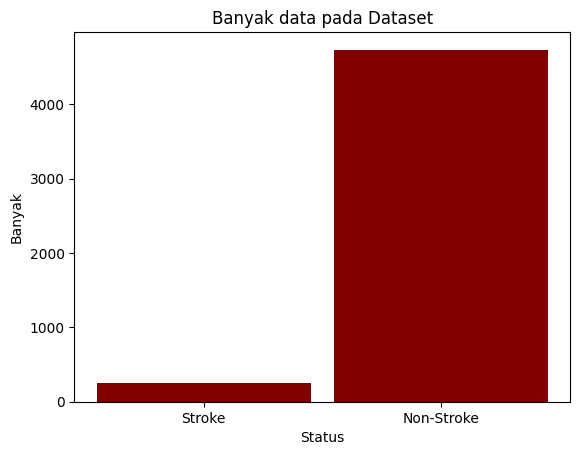

In [12]:
# Untuk plot dataset
data = {'Stroke': len(df[df['stroke'] == 1]), 'Non-Stroke':len(df[df['stroke'] == 0])}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure()
 
# Creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.9)
 
plt.xlabel("Status")
plt.ylabel("Banyak")
plt.title("Banyak data pada Dataset")
plt.show()

# Oversampling Dataset
Menggunakan method RandomOverSampler() karena memiliki akurasi yang lebih tinggi jika dibandingkan dengan metode SMOTE

In [13]:
#Dikarenakan data labelnya timpang, jadi dilakukan oversampling data
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(sorted(Counter(y_over).items()))

[(0, 4733), (1, 4733)]


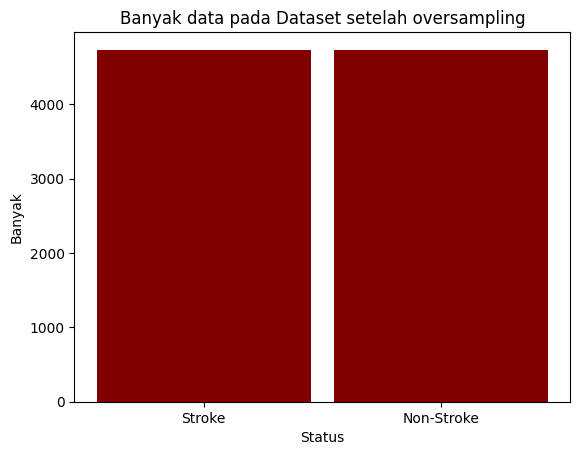

In [14]:
# Untuk plot dataset setelah data dilakukan oversampling
data = {'Stroke': len(y_over[y_over == 1]), 'Non-Stroke': len(y_over[y_over == 0])}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure()
 
# Creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.9)
 
plt.xlabel("Status")
plt.ylabel("Banyak")
plt.title("Banyak data pada Dataset setelah oversampling")
plt.show()

# Dataset Split untuk mendapatkan Data Train dan Data Test
Menggunakan 33% dataset sebagai data test dan 67% dataset sebagai data train. Splitting ini menggunakan method train_test_split()

In [15]:
#Split train/test model dengan hasil oversample
X_train_rs, X_test_rs, y_train_rs , y_test_rs = train_test_split(X_over,y_over, test_size = 0.33, random_state = 42)
X_train_rs.shape, X_test_rs.shape

((6342, 16), (3124, 16))

# Tuning Parameter untuk mendapatkan parameter terbaik
Menggunakan method RandomizedSearchCV dari library sklearn agar bisa memberikan akurasi terbaik

Note: Bagian ini akan membutuhkan waktu yang lama untuk dijalankan. Untuk mempersingkat waktu, **tidak perlu menjalankan block of code ini jika sudah ada file 'bestParameter.csv' (File terlampir)** 

Apabila sudah terlanjur menjalankan, direkomendasikan untuk upload ulang file bestParameter.csv ke dalam runtime. Kemudian jalankan 2 section setelah ini.

In [16]:
#Hyperparameter dengan RandomizedSearchCV untuk mendapatkan paramater terbaik untuk RFC (Random Forest Classifier)
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
randomstate = [None, 0, 21, 42]
n_estimators = [60,100,200,500]
min_samples_split = range(2,8,1)
min_samples_leaf = range(1,8,1)

param = dict(n_estimators = n_estimators,  random_state = randomstate,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param, cv = 5, verbose=2, random_state=42, n_iter = 1000)
rfc_random.fit(X_train_rs, y_train_rs)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 672 is smaller than n_iter=1000. Running 672 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=None; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=None; total time=   0.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=None; total time=   0.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=None; total time=   0.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=None; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=0; total time=   0.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=0; total time=   0.2s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=0; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=60, random_state=0; total time=   0.2s
[CV

KeyboardInterrupt: 

In [ ]:
 #Cek parameter terbaik
rfc_random.best_params_

# Proses Ekspor Best Parameter yang sudah didapat dari iterasi
Bagian ini tidak perlu dijalankan apabila block of code section berikutnya tidak dijalankan.

Apabila terlanjur, **silakan upload ulang file 'bestParameter.csv'** yang terlampir. Kemudian jalankan section berikutnya

In [ ]:
#Simpan BestParameter ke CSV
import csv

with open('bestParameter.csv', 'w', newline='') as csvfile:
  fieldnames = ['n_estimators', 'min_samples_split', 'min_samples_leaf', 'random_state']

  thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
  thewriter.writeheader()

  thewriter.writerow({'n_estimators': rfc_random.best_params_['n_estimators'],'min_samples_split':rfc_random.best_params_['min_samples_split'], 'min_samples_leaf':rfc_random.best_params_['min_samples_leaf'], 'random_state' : rfc_random.best_params_['random_state']})

#Proses Impor Best Parameter
Jalankan block of code ini, namun pastikan sudah upload 'bestParameter.csv'

In [17]:
#Impor BestParameter
rfcParameter = pd.read_csv("bestParameter.csv")

In [18]:
#Lihat BestParameter
rfcParameter

,n_estimators,min_samples_split,min_samples_leaf,random_state
0,60,3,1,42


In [19]:
#Load BestParameter untuk dijadikan parameter pada method RandomForestClassifier
rfc = RandomForestClassifier(random_state=rfcParameter['random_state'][0], min_samples_leaf=rfcParameter['min_samples_leaf'][0], min_samples_split=rfcParameter['min_samples_split'][0], n_estimators=rfcParameter['n_estimators'][0])
rfc.fit(X_train_rs, y_train_rs)
y_pred_rfc = rfc.predict(X_test_rs)

In [20]:
#Cek Accuracy, Precision, Recall, dan F1
print(confusion_matrix(y_test_rs,y_pred_rfc))
print('The accuracy is: {:.9f}'.format(accuracy_score(y_test_rs,y_pred_rfc)))
print('The classification report is:\n{:}'.format(classification_report(y_test_rs,y_pred_rfc)))

[[1532   35]
 [   0 1557]]
The accuracy is: 0.988796415
The classification report is:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1567
           1       0.98      1.00      0.99      1557

    accuracy                           0.99      3124
   macro avg       0.99      0.99      0.99      3124
weighted avg       0.99      0.99      0.99      3124



#Proses Input Output Aplikasi
Silakan jalankan bagian ini untuk melakukan prediksi strok otak

In [22]:
# Deklarasi function untuk input output aplikasi

def is_float_digit(n: str) -> bool:
     try:
         float(n)
         return True
     except ValueError:
         return False

def inputUser(attributeName, list):
  while True:
    strInput = input("Enter your " + attributeName + " " + str(list) + ": ")
    strInput = strInput.lower()
    
    for count, x in enumerate(list):
      if(strInput==x):
        return count
    print("Terdapat kesalahan pada input yang anda berikan. Tolong sesuaikan dengan instruksi\n")

def inputUserDummies(attributeName, list):
  while True:
    strInput = input("Enter your " + attributeName + " " + str(list) + ": ")
    strInput = strInput.lower()
    userArr = np.zeros(shape=len(list), dtype=int)
    
    for count, x in enumerate(list):
      if(strInput==x):
        userArr[count]=1
        return userArr
    print("Terdapat kesalahan pada input yang anda berikan. Tolong sesuaikan dengan instruksi\n")

def inputUserNumber(attributeName):
  while True:
    intInput = float(input("Enter your " + attributeName + " : "))
    if(is_float_digit(intInput)==True):
      return intInput
      break;
    print("Terdapat kesalahan pada input yang anda berikan. Tolong sesuaikan dengan instruksi\n")

In [23]:
# Input User
gender = inputUser("gender", ["male", "female"])
age = inputUserNumber("age")
hypertension = inputUser("hypertension", ["no", "yes"])
heart_disease = inputUser("heart disease", ["no", "yes"])
ever_married = inputUser("ever married", ["no", "yes"])
residence_type = inputUser("residence type ", ["urban", "rural"])
avg_glucose = inputUserNumber("average glucose level")
bmi = inputUserNumber("bmi")
govt_job, private, self_employed, children = inputUserDummies("work_type", ["govt_job", "private", "self_employed", "children"])
unknown, formerly_smoked, never_smoked, smokes = inputUserDummies("smoking_status", ["unknown", "formerly_smoked", "never_smoked", "smokes"])

array = [gender, age, hypertension, heart_disease, ever_married, residence_type, avg_glucose, bmi, govt_job, private, self_employed, children, unknown, formerly_smoked, never_smoked, smokes]

# Create dataframe
df2 = pd.DataFrame([array], columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'])

# Menampilkan prediksi
if(rfc.predict(df2)[0]==0):
  print("\nKamu diprediksi tidak strok otak. Tetap jaga kesehatan dan olahraga secara teratur.")
else:
  print("\nKamu diprediksi menderita strok otak. Segera konsultasikan ke rumah sakit terdekat.")


Kamu diprediksi tidak strok otak. Tetap jaga kesehatan dan olahraga secara teratur.
